# 1. Aperçu rapide: Head

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

import process_CSV

# Nettoyer le set de donnés
if not os.path.exists("./plane_ticket_price_cleaned.csv"):
    process_CSV.process_and_save("./plane_ticket_price_original.csv", "./plane_ticket_price_cleaned.csv")

# Charger le set de données
data_path = os.path.join("./plane_ticket_price_cleaned.csv")
df = pd.read_csv(data_path, delimiter=',')

# Afficher Head
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,3120,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1920,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1800,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2940,1,No info,13302,1,3,16,50,21,35


# 2. Information générales: info, describe, columns

In [32]:
# Nom des colonnes
print("Nom des colonnes:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Informations générales
print("Informations générales:")
df.info()
print("\n" + "="*50 + "\n")

# Description statistique
print("Description statistique:")
df.describe()

Nom des colonnes:
['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Departure_hour', 'Departure_min', 'Arrival_hour', 'Arrival_min']


Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  int64 
 5   Total_Stops      10682 non-null  int64 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Departure_hour   10682 non-null  int64 
 11  Departure_min    10682 non-null  int64 
 12  Arrival_hour 

,Duration,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2314.291331,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,1078.187453,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,180.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1560.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,2220.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,3120.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,5220.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


# 3. Analyse exploratoire et diagnostique

## 3.1 Valeurs manquantes

In [33]:
# Détection des valeurs manquantes
print("=== VALEURS MANQUANTES ===\n")

# Nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()
print("Nombre de valeurs manquantes par colonne:")
print(missing_values)
print("\n" + "="*50 + "\n")

# Pourcentage de valeurs manquantes
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Pourcentage de valeurs manquantes par colonne:")
print(missing_percentage.round(2))
print("\n" + "="*50 + "\n")

# Résumé des valeurs manquantes
missing_summary = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage (%)': missing_percentage.values
})
missing_summary = missing_summary[missing_summary['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

if len(missing_summary) > 0:
    print("Résumé des colonnes avec valeurs manquantes:")
    print(missing_summary.to_string(index=False))
else:
    print("Aucune valeur manquante détectée dans le dataset ✓")

=== VALEURS MANQUANTES ===

Nombre de valeurs manquantes par colonne:
Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Departure_hour     0
Departure_min      0
Arrival_hour       0
Arrival_min        0
dtype: int64


Pourcentage de valeurs manquantes par colonne:
Airline            0.0
Source             0.0
Destination        0.0
Route              0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
Journey_day        0.0
Journey_month      0.0
Departure_hour     0.0
Departure_min      0.0
Arrival_hour       0.0
Arrival_min        0.0
dtype: float64


Aucune valeur manquante détectée dans le dataset ✓


## 3.2 Valeurs dupliquées

In [34]:
# Détection des valeurs dupliquées
print("=== VALEURS DUPLIQUÉES ===\n")

# Nombre total de lignes
total_rows = len(df)
print(f"Nombre total de lignes: {total_rows}")

# Nombre de lignes dupliquées
duplicate_rows = df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicate_rows}")

# Pourcentage de lignes dupliquées
duplicate_percentage = (duplicate_rows / total_rows) * 100
print(f"Pourcentage de lignes dupliquées: {duplicate_percentage:.2f}%")
print("\n" + "="*50 + "\n")

# Afficher quelques exemples de lignes dupliquées si elles existent
if duplicate_rows > 0:
    print(f"Exemples de lignes dupliquées (max 5):")
    duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10)
    print(duplicates)
else:
    print("Aucune ligne dupliquée détectée dans le dataset ✓")

=== VALEURS DUPLIQUÉES ===

Nombre total de lignes: 10682
Nombre de lignes dupliquées: 222
Pourcentage de lignes dupliquées: 2.08%


Exemples de lignes dupliquées (max 5):
        Airline    Source Destination                  Route  Duration  \
1021   Air Asia  Banglore   New Delhi              BLR → DEL      2820   
8733   Air Asia  Banglore   New Delhi              BLR → DEL      2820   
6321  Air India  Banglore   New Delhi  BLR → BOM → AMD → DEL      2640   
9847  Air India  Banglore   New Delhi  BLR → BOM → AMD → DEL      2640   
5222  Air India  Banglore   New Delhi  BLR → BOM → NAG → DEL      3000   
9941  Air India  Banglore   New Delhi  BLR → BOM → NAG → DEL      3000   
572   Air India  Banglore   New Delhi              BLR → DEL      2820   
8168  Air India  Banglore   New Delhi              BLR → DEL      2820   
672   Air India     Delhi      Cochin  DEL → AMD → BOM → COK      3180   
5363  Air India     Delhi      Cochin  DEL → AMD → BOM → COK      3180   

      Total_S

## 3.3 Valeurs aberrantes (Outliers) - Visualisation par boxplots

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

In [36]:
# Analyse des valeurs aberrantes pour la variable Price (notre variable cible)
print("=== ANALYSE DES VALEURS ABERRANTES ===\n")

# Statistiques sur les prix
print("Statistiques descriptives pour Price:")
print(df['Price'].describe())
print("\n" + "="*50 + "\n")

# Calcul des quartiles et de l'IQR (Interquartile Range)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Limites pour les outliers (méthode IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25e percentile): {Q1}")
print(f"Q3 (75e percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Limite inférieure (Q1 - 1.5*IQR): {lower_bound}")
print(f"Limite supérieure (Q3 + 1.5*IQR): {upper_bound}")
print("\n" + "="*50 + "\n")

# Détection des outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
n_outliers = len(outliers)
outliers_percentage = (n_outliers / len(df)) * 100

print(f"Nombre d'outliers détectés: {n_outliers}")
print(f"Pourcentage d'outliers: {outliers_percentage:.2f}%")

if n_outliers > 0:
    print(f"\nPrix minimum des outliers: {outliers['Price'].min()}")
    print(f"Prix maximum des outliers: {outliers['Price'].max()}")

=== ANALYSE DES VALEURS ABERRANTES ===

Statistiques descriptives pour Price:
count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


Q1 (25e percentile): 5277.0
Q3 (75e percentile): 12373.0
IQR (Interquartile Range): 7096.0
Limite inférieure (Q1 - 1.5*IQR): -5367.0
Limite supérieure (Q3 + 1.5*IQR): 23017.0


Nombre d'outliers détectés: 94
Pourcentage d'outliers: 0.88%

Prix minimum des outliers: 23170
Prix maximum des outliers: 79512


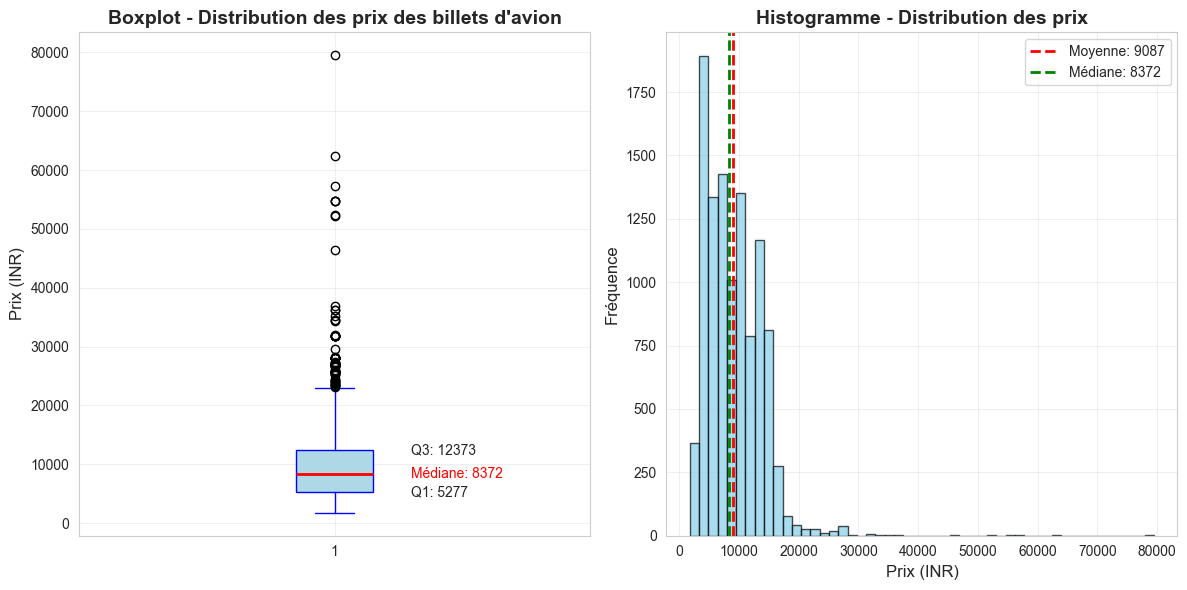

In [37]:
# Visualisation 1 : Boxplot simple pour la variable Price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['Price'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Prix (INR)', fontsize=12)
plt.title('Boxplot - Distribution des prix des billets d\'avion', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Ajout d'annotations
plt.text(1.15, Q1, f'Q1: {Q1:.0f}', fontsize=10, va='center')
plt.text(1.15, Q3, f'Q3: {Q3:.0f}', fontsize=10, va='center')
plt.text(1.15, df['Price'].median(), f'Médiane: {df["Price"].median():.0f}', fontsize=10, va='center', color='red')

plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df["Price"].mean():.0f}')
plt.axvline(df['Price'].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: {df["Price"].median():.0f}')
plt.xlabel('Prix (INR)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Histogramme - Distribution des prix', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

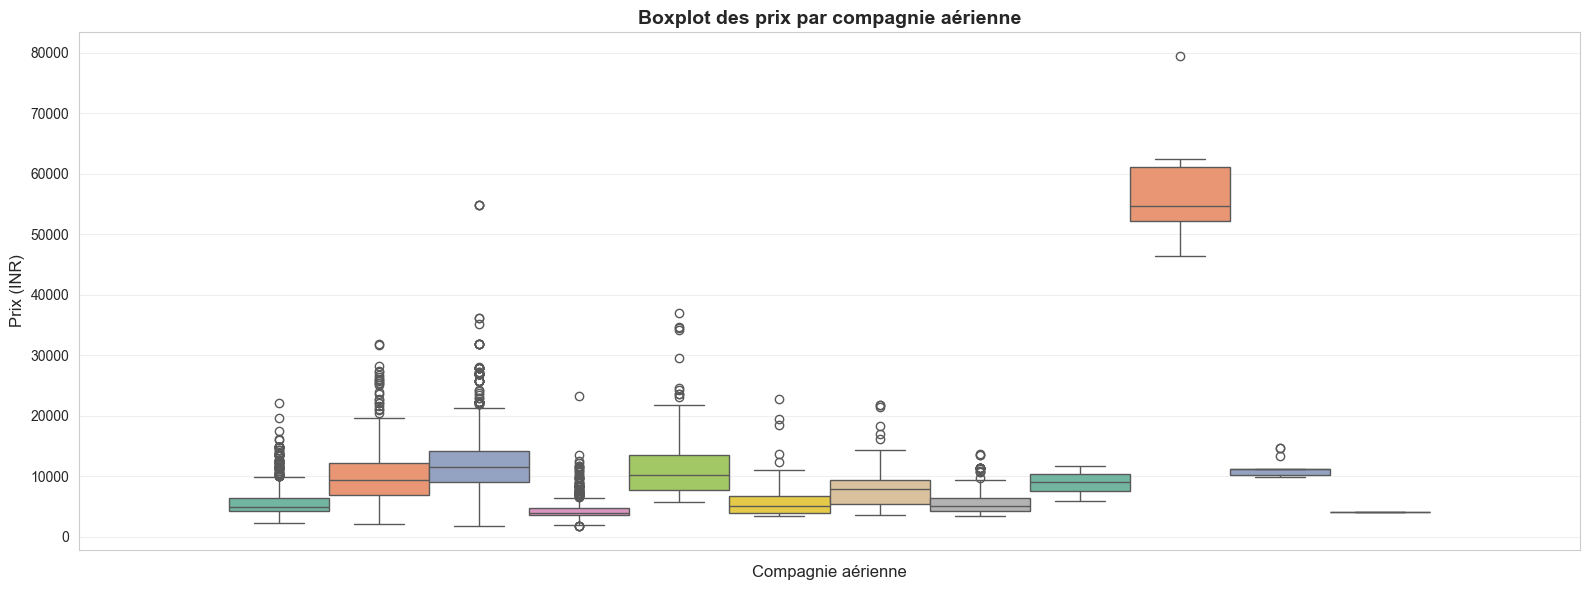


Statistiques des prix par compagnie aérienne:
                                    count      mean       std      min  \
Airline                                                                  
Air Asia                            319.0   5590.26   2027.36   3383.0   
Air India                          1751.0   9612.43   3901.73   2050.0   
GoAir                               194.0   5861.06   2703.59   3398.0   
IndiGo                             2053.0   5673.68   2264.14   2227.0   
Jet Airways                        3849.0  11643.92   4258.94   1840.0   
Jet Airways Business                  6.0  58358.67  11667.60  46490.0   
Multiple carriers                  1196.0  10902.68   3721.23   5797.0   
Multiple carriers Premium economy    13.0  11418.85   1717.15   9845.0   
SpiceJet                            818.0   4338.28   1849.92   1759.0   
Trujet                                1.0   4140.00       NaN   4140.0   
Vistara                             479.0   7796.35   2914.30   3

In [38]:
# Visualisation 2 : Boxplots par compagnie aérienne
plt.figure(figsize=(16, 6))

# Trier les compagnies par prix médian pour une meilleure visualisation
airline_order = df.groupby('Airline')['Price'].median().sort_values().index

plt.subplot(1, 1, 1)
sns.boxplot(data=df, hue='Airline', y='Price', legend=False, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Compagnie aérienne', fontsize=12)
plt.ylabel('Prix (INR)', fontsize=12)
plt.title('Boxplot des prix par compagnie aérienne', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistiques par compagnie
print("\nStatistiques des prix par compagnie aérienne:")
print(df.groupby('Airline')['Price'].describe().round(2))

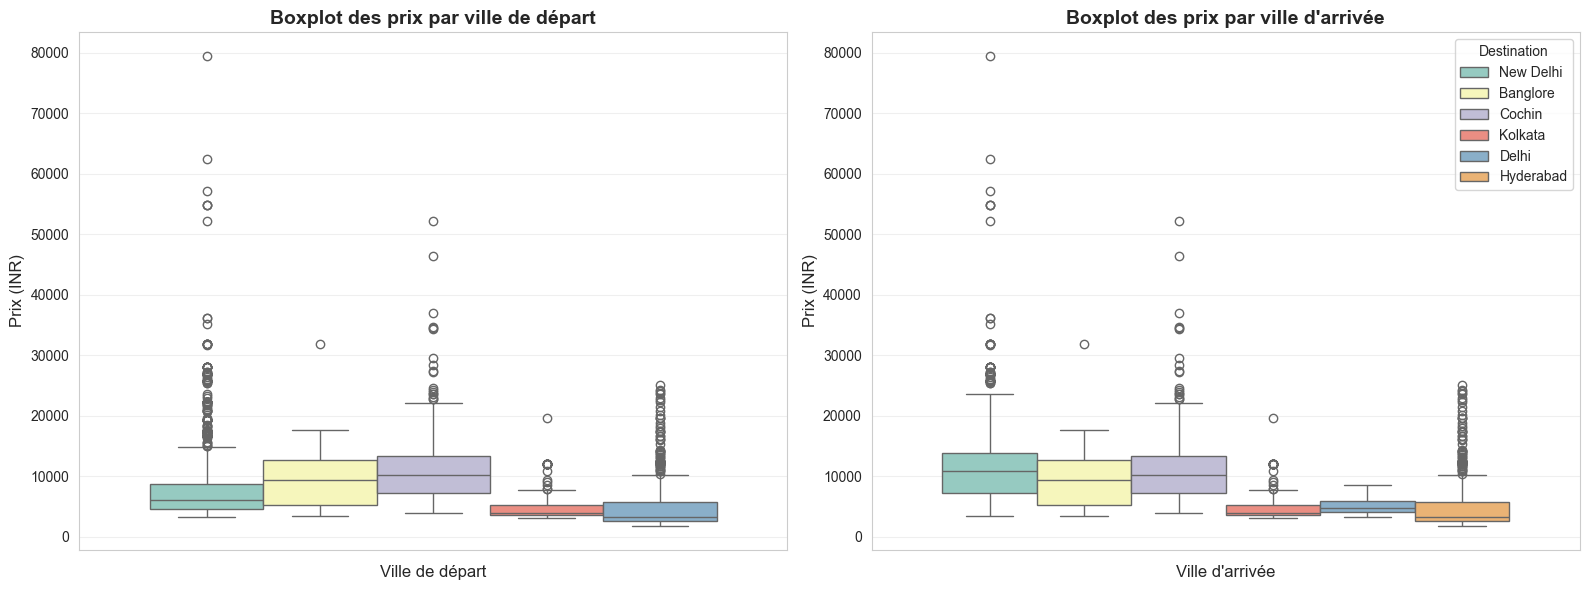

In [39]:
# Visualisation 3 : Boxplots par Source et Destination
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot par Source
source_order = df.groupby('Source')['Price'].median().sort_values().index
sns.boxplot(data=df, hue='Source', y='Price', legend=False, palette='Set3', ax=axes[0])
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xlabel('Ville de départ', fontsize=12)
axes[0].set_ylabel('Prix (INR)', fontsize=12)
axes[0].set_title('Boxplot des prix par ville de départ', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Boxplot par Destination
dest_order = df.groupby('Destination')['Price'].median().sort_values().index
sns.boxplot(data=df, hue='Destination', y='Price', palette='Set3', ax=axes[1])
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xlabel('Ville d\'arrivée', fontsize=12)
axes[1].set_ylabel('Prix (INR)', fontsize=12)
axes[1].set_title('Boxplot des prix par ville d\'arrivée', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

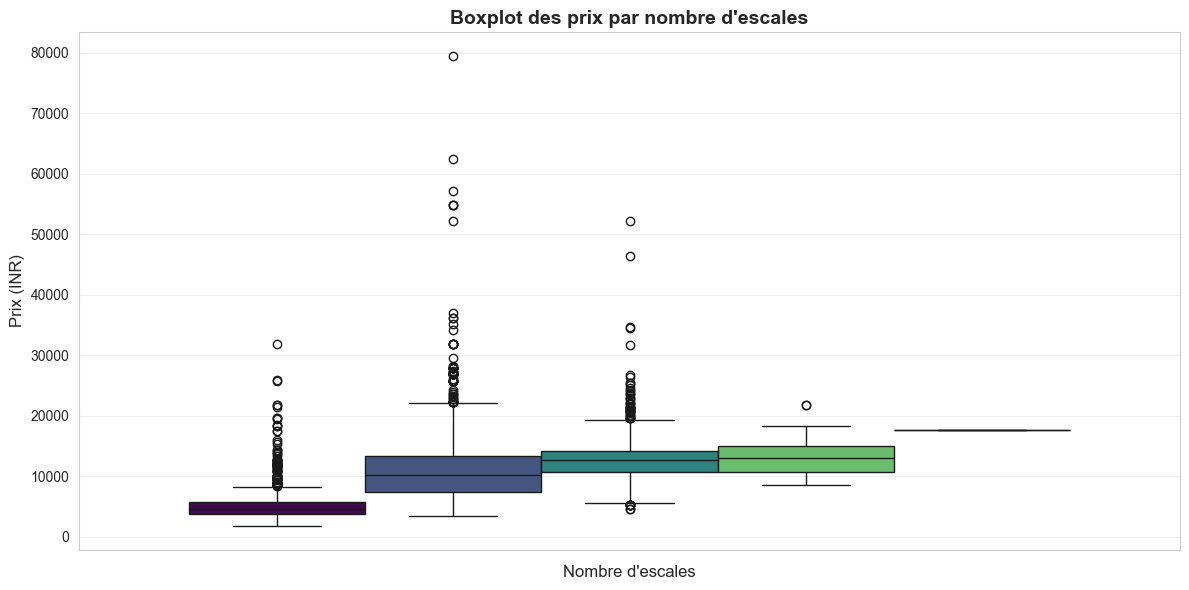


Statistiques des prix par nombre d'escales:
              count      mean      std      min      25%      50%      75%  \
Total_Stops                                                                  
0            3491.0   5024.90  2077.59   1759.0   3858.0   4667.0   5678.0   
1            5625.0  10594.12  4281.65   3480.0   7480.0  10262.0  13364.0   
2            1520.0  12715.81  3383.98   4647.0  10676.0  12760.0  14237.0   
3              45.0  13112.00  2963.22   8607.0  10703.0  12954.0  14960.0   
4               1.0  17686.00      NaN  17686.0  17686.0  17686.0  17686.0   

                 max  
Total_Stops           
0            31945.0  
1            79512.0  
2            52285.0  
3            21829.0  
4            17686.0  


In [40]:
# Visualisation 4 : Boxplot par nombre d'escales (Total_Stops)
plt.figure(figsize=(12, 6))

# Nettoyer les valeurs nulles pour Total_Stops
df_stops = df.dropna(subset=['Total_Stops'])

sns.boxplot(data=df_stops, hue='Total_Stops', y='Price', palette='viridis', legend=False)
plt.xlabel('Nombre d\'escales', fontsize=12)
plt.ylabel('Prix (INR)', fontsize=12)
plt.title('Boxplot des prix par nombre d\'escales', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\nStatistiques des prix par nombre d'escales:")
print(df_stops.groupby('Total_Stops')['Price'].describe().round(2))

## 3.4 Résumé de l'analyse exploratoire

In [41]:
print("="*70)
print("RÉSUMÉ DE L'ANALYSE EXPLORATOIRE ET DIAGNOSTIQUE")
print("="*70)

# 1. Valeurs manquantes
missing_count = df.isnull().sum().sum()
print(f"\n1. VALEURS MANQUANTES:")
print(f"   - Nombre total de valeurs manquantes: {missing_count}")
if missing_count > 0:
    print(f"   - Colonnes concernées: {df.columns[df.isnull().any()].tolist()}")
else:
    print(f"   - Aucune valeur manquante ✓")

# 2. Valeurs dupliquées
duplicate_count = df.duplicated().sum()
print(f"\n2. VALEURS DUPLIQUÉES:")
print(f"   - Nombre de lignes dupliquées: {duplicate_count}")
print(f"   - Pourcentage: {(duplicate_count/len(df)*100):.2f}%")

# 3. Valeurs aberrantes
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers_count = len(df[(df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR)])
print(f"\n3. VALEURS ABERRANTES (OUTLIERS):")
print(f"   - Nombre d'outliers pour Price: {outliers_count}")
print(f"   - Pourcentage: {(outliers_count/len(df)*100):.2f}%")
print(f"   - Ces valeurs nécessitent une attention particulière lors du preprocessing")

# 4. Statistiques générales
print(f"\n4. STATISTIQUES GÉNÉRALES:")
print(f"   - Nombre total de lignes: {len(df)}")
print(f"   - Nombre de colonnes: {len(df.columns)}")
print(f"   - Prix moyen: {df['Price'].mean():.2f} INR")
print(f"   - Prix médian: {df['Price'].median():.2f} INR")
print(f"   - Écart-type: {df['Price'].std():.2f} INR")

RÉSUMÉ DE L'ANALYSE EXPLORATOIRE ET DIAGNOSTIQUE

1. VALEURS MANQUANTES:
   - Nombre total de valeurs manquantes: 0
   - Aucune valeur manquante ✓

2. VALEURS DUPLIQUÉES:
   - Nombre de lignes dupliquées: 222
   - Pourcentage: 2.08%

3. VALEURS ABERRANTES (OUTLIERS):
   - Nombre d'outliers pour Price: 94
   - Pourcentage: 0.88%
   - Ces valeurs nécessitent une attention particulière lors du preprocessing

4. STATISTIQUES GÉNÉRALES:
   - Nombre total de lignes: 10682
   - Nombre de colonnes: 14
   - Prix moyen: 9087.21 INR
   - Prix médian: 8372.00 INR
   - Écart-type: 4611.55 INR


In [42]:
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

# Définition des features de la cible

x = df[['Duration', 'Total_Stops', 'Journey_day', 'Journey_month', 'Departure_hour'] + 
       [col for col in df.columns if col.startswith(('Airline_', 'Source_', 'Destination_', 'Additional_Info_'))]]

y = df['Price']

In [43]:
# Normaliser les variables numériques (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [44]:
#Regression linéaire

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluation du modele
print("Erreur absolue moyenne :", mean_absolute_error(y_test, y_pred))
print("Score R2 :", r2_score(y_test, y_pred))

Erreur absolue moyenne : 1779.5378202244724
Score R2 : 0.6892683710776288


In [45]:
coeffs = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coeffs.sort_values(by='Coefficient', ascending=False))


                                         Feature  Coefficient
8                            Airline_Jet Airways  2986.587483
1                                    Total_Stops  1737.170648
10                     Airline_Multiple carriers  1262.062131
9                   Airline_Jet Airways Business   939.832862
5                              Airline_Air India   669.175083
14                               Airline_Vistara   452.938144
24                         Destination_New Delhi   371.114242
27                Additional_Info_Business class   277.369340
11     Airline_Multiple carriers Premium economy   141.830514
4                                 Departure_hour   118.099357
7                                 Airline_IndiGo   117.139005
20                            Destination_Cochin    66.484001
17                                  Source_Delhi    66.484001
15               Airline_Vistara Premium economy    57.429932
25               Additional_Info_1 Short layover    51.580538
26      